In [4]:
#!/usr/bin/python3.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
# import tensorflow as tf
from sklearn.model_selection import train_test_split


%matplotlib notebook

In [5]:
# ================= CONSTANTS =================
PMT_PULSE_LENGTH = 1500  # Sample lenght of a typical pulse
SAMPLES_BEFORE_PEAK = 4  # Samples to store before peak detection. MUST BE SMALLER THAN 8

In [ ]:
#Loading dataset
dfIndividual = pd.read_csv("../PeakDetection_Cs137_IndividualPulses.csv", index_col = 0)

# FIR Filtering of each isolated pulse

In [79]:
CURRENT_PULSE_INDEX = 9
FIR_LENGTH = 40

<IPython.core.display.Javascript object>


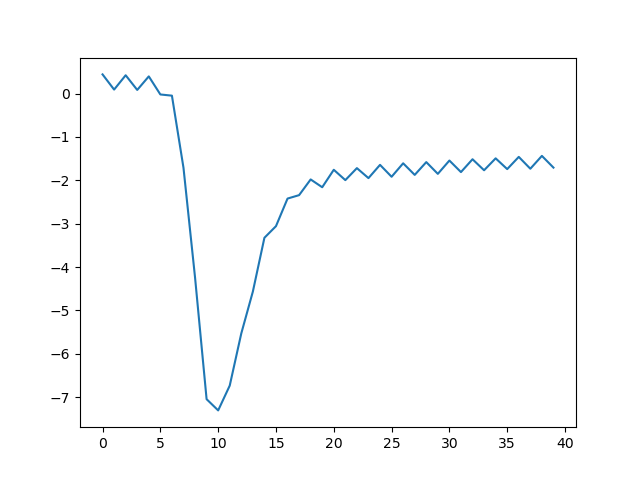

In [80]:
firCoefsCs137 = pd.read_csv("../FirCoefficients_Cs137.csv", index_col = 0)
firCoefsCs137 = firCoefsCs137[firCoefsCs137.columns[0]].values


%matplotlib notebook
plt.plot(firCoefsCs137[:FIR_LENGTH])
plt.show()

In [81]:
def filterSinglePulse(pulse, coefficients):
    init = list(pulse)
#     init = [max(pulse)]*len(pulse)
#     init.extend(pulse)
#     init.extend([max(pulse)]*len(pulse))
    x = np.convolve(init, np.flip(coefficients[:FIR_LENGTH]), mode = "valid")
    return x.tolist()

In [82]:
testPulses = dfIndividual[dfIndividual.columns[:]]

In [83]:
filteredPulses = []
for i in testPulses:
    filteredPulses.append(filterSinglePulse(testPulses[i].values,firCoefsCs137))

### Pulse correlation analysis

<IPython.core.display.Javascript object>


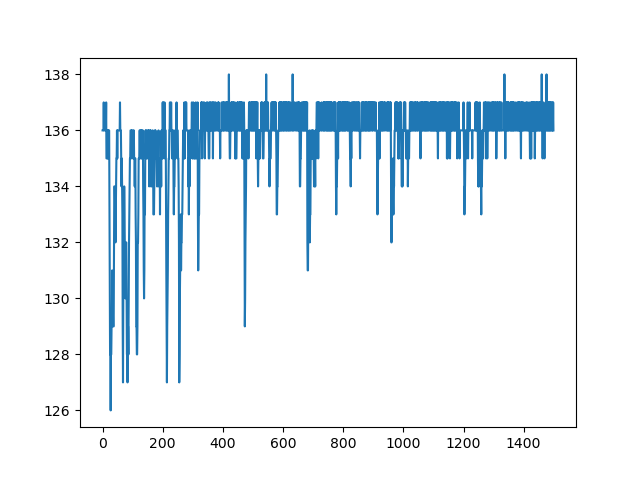

In [84]:
%matplotlib notebook
dfIndividual[dfIndividual.columns[CURRENT_PULSE_INDEX]].plot()
plt.show()

<IPython.core.display.Javascript object>


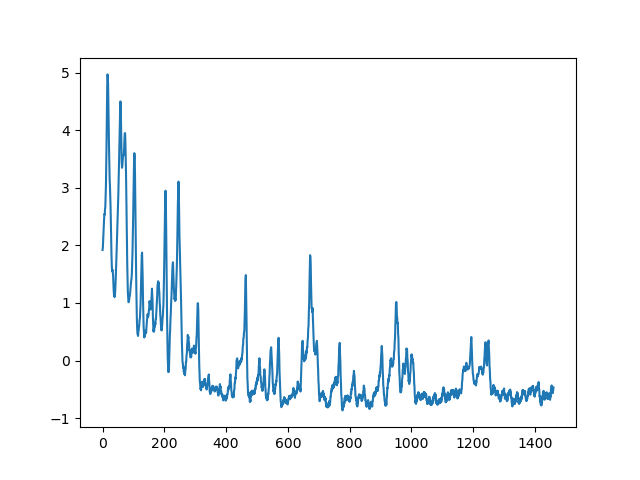

In [85]:
sample = filteredPulses[CURRENT_PULSE_INDEX]
sample = (sample - np.average(sample))/np.std(sample)
%matplotlib notebook
plt.plot(sample)
plt.show()

# Area computation

In [ ]:
def singlePulseToArea(singlePulse):
    newPulse = max(singlePulse) - singlePulse
    return sum(newPulse)

In [16]:
dfAreas = pd.DataFrame(columns = ["Cs137"])

In [17]:
dfAreas["Cs137"] = dfPulses.apply(singlePulseToArea, axis = 0)

In [18]:
dfAreas

Cs137
0      119237.578469
1      119237.578469
2      119237.578469
3      109663.758300
4      118367.231180
...              ...
26078  118367.231180
26079  115756.189316
26080  114015.494740
26081  115756.189316
26082  119237.578469

[26083 rows x 1 columns]

In [19]:
dfAreas.to_csv("../PeakDetection_Cs137_Areas_Filtered.csv")

<IPython.core.display.Javascript object>


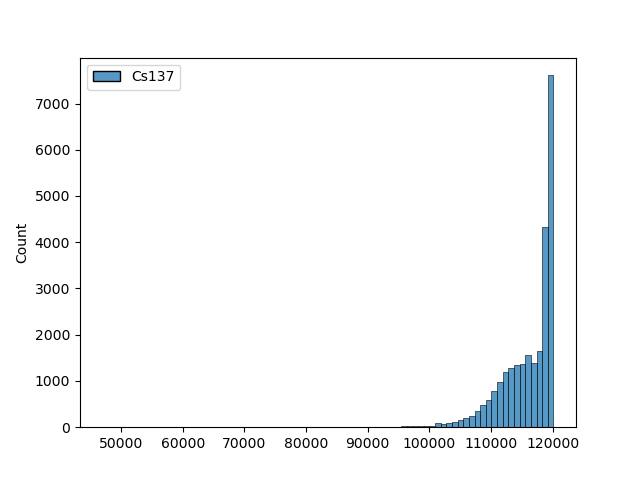

In [24]:
%matplotlib notebook
sns.histplot(dfAreas, bins = 80)
plt.show()

In [96]:
dfAreasCo60 = pd.read_csv("../PeakDetection_Co60_Areas.csv", index_col = 0)

In [103]:
dfAreasCs137 = dfAreas[:len(dfAreasCo60)]

In [114]:
dfAreasCo60

60Co
0      8142
1      3884
2      3683
3      5881
4      2574
...     ...
24199  3637
24200  6098
24201  7142
24202  3895
24203  6781

[24204 rows x 1 columns]

<IPython.core.display.Javascript object>


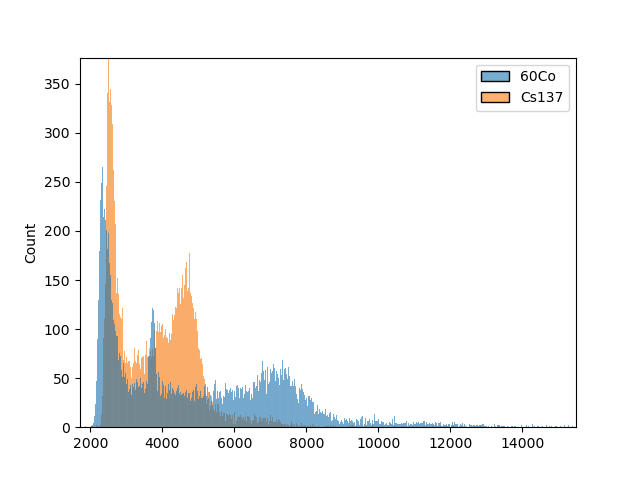

In [124]:
%matplotlib notebook

sns.histplot(data = [dfAreasCo60["60Co"], dfAreasCs137["Cs137"]], alpha = 0.6, bins = 10000)


plt.show()